In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_csv(file_name: str):
    df = pd.read_csv(file_name)
    df.columns = ["iteration", "accuracy_threshold", "accuracy", "explanation_corrections",
                  "label_corrections", "unfair_explanations_L", "unfair_explanations_test", "DN_FP_counter_L",
                  "DN_FP_counter_test", "mean_diff_shap_values_L", "mean_diff_shap_values_test", "mean_shap_values_L",
                  "mean_shap_values_test", "statistical_parity", "equalized_odds", "equal_opportunity",
                  "false_positive_error_rate_balance", "predictive_parity"]
    return df

In [3]:
path = '/Users/slanyel/PycharmProjects/ma_heidrich_interactiveexplanations/simulation_files/simulation_data_2022-09-15 15:48:49_min_perc=0.005_T=100.csv'

In [4]:
df = read_csv(path)
df

,iteration,accuracy_threshold,accuracy,explanation_corrections,label_corrections,unfair_explanations_L,unfair_explanations_test,DN_FP_counter_L,DN_FP_counter_test,mean_diff_shap_values_L,mean_diff_shap_values_test,mean_shap_values_L,mean_shap_values_test,statistical_parity,equalized_odds,equal_opportunity,false_positive_error_rate_balance,predictive_parity
0,1,0.7,0.750000,1,1,384,184,457,249,0.000033,-0.000182,0.016241,0.014934,-0.075242,-0.172929,-0.044104,-0.301754,-0.050332
1,2,0.7,0.716667,1,1,387,176,453,244,-0.000047,0.000221,0.016441,0.014835,-0.075944,-0.151472,-0.080388,-0.222556,-0.010000
2,3,0.7,0.733333,1,1,345,183,437,237,-0.000110,-0.000137,0.016131,0.014647,-0.073670,-0.144565,-0.073089,-0.216040,-0.012854
3,4,0.7,0.723333,1,2,338,166,429,225,-0.000320,-0.000097,0.016515,0.015280,-0.071862,-0.110716,-0.051507,-0.169925,-0.002422
4,5,0.7,0.750000,2,2,371,182,440,249,-0.000369,0.000031,0.016519,0.015135,-0.075986,-0.113074,-0.080284,-0.145865,0.007154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,0.7,0.736667,29,36,286,101,404,151,0.000183,0.000237,0.016208,0.014525,-0.041748,-0.114261,-0.058597,-0.169925,-0.001174
95,96,0.7,0.736667,29,36,238,90,363,136,-0.000057,-0.000026,0.016354,0.014898,-0.039985,-0.103417,-0.036910,-0.169925,-0.005594
96,97,0.7,0.750000,29,36,251,106,383,160,-0.000144,-0.000400,0.016515,0.014904,-0.040647,-0.045272,-0.036910,-0.053634,0.028006
97,98,0.7,0.753333,29,37,236,85,357,123,0.000015,0.000307,0.016300,0.014811,-0.044030,-0.051920,-0.015118,-0.088722,0.013709


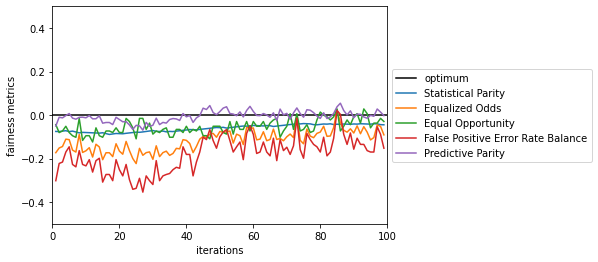

In [5]:
fig, ax = plt.subplots()
ax.set_xlim(0, 100)
ax.set_ylim(-0.5, 0.5)  # (-1,1)

plt.axhline(y=0, xmin=0, xmax=100, color='black')
ax.plot(df['iteration'], df['statistical_parity'])
ax.plot(df['iteration'], df['equalized_odds'])
ax.plot(df['iteration'], df['equal_opportunity'])
ax.plot(df['iteration'], df['false_positive_error_rate_balance'])
ax.plot(df['iteration'], df['predictive_parity'])

ax.set_xlabel("iterations")
ax.set_ylabel("fairness metrics")
fig.legend(['optimum', 'Statistical Parity', 
            'Equalized Odds', 'Equal Opportunity', 
            'False Positive Error Rate Balance',
            'Predictive Parity'],
            loc='center left', bbox_to_anchor=(0.9, 0.5))
plt.show()

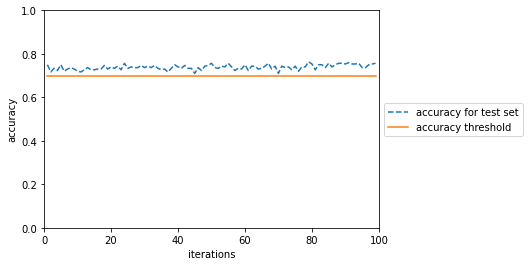

In [6]:
fig, ax = plt.subplots()
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)

ax.plot(df['iteration'], df['accuracy'], linestyle='dashed')
ax.plot(df['iteration'], df['accuracy_threshold'])

ax.set_xlabel("iterations")
ax.set_ylabel("accuracy")
fig.legend(['accuracy for test set', 'accuracy threshold'],
          loc='center left', bbox_to_anchor=(0.9, 0.5))
plt.show()

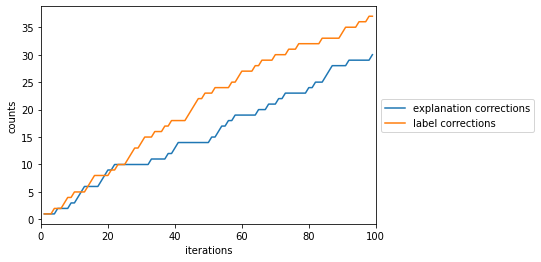

In [7]:
fig, ax = plt.subplots()
ax.set_xlim(0, 100)

ax.plot(df['iteration'], df['explanation_corrections'])
ax.plot(df['iteration'], df['label_corrections'])

ax.set_xlabel("iterations")
ax.set_ylabel("counts")
fig.legend(['explanation corrections', 'label corrections'],
           loc='center left', bbox_to_anchor=(0.9, 0.5))
plt.show()

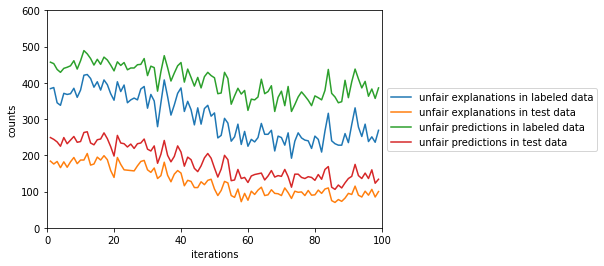

In [8]:
fig, ax = plt.subplots()
ax.set_xlim(0, 100)
ax.set_ylim(0, 600)

ax.plot(df['iteration'], df['unfair_explanations_L'])
ax.plot(df['iteration'], df['unfair_explanations_test'])
ax.plot(df['iteration'], df['DN_FP_counter_L'])
ax.plot(df['iteration'], df['DN_FP_counter_test'])

ax.set_xlabel("iterations")
ax.set_ylabel("counts")
fig.legend(['unfair explanations in labeled data', 
            'unfair explanations in test data',
            'unfair predictions in labeled data', 
            'unfair predictions in test data'],
            loc='center left', bbox_to_anchor=(0.9, 0.5))
plt.show()

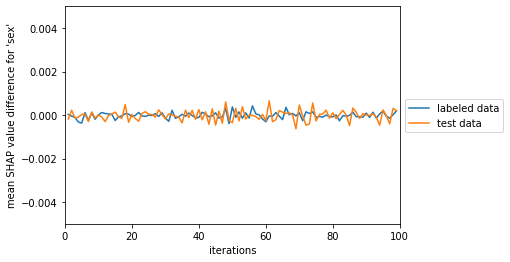

In [9]:
fig, ax = plt.subplots()
ax.set_xlim(0, 100)
ax.set_ylim(-0.005, 0.005)

ax.plot(df['iteration'], df['mean_diff_shap_values_L'])
ax.plot(df['iteration'], df['mean_diff_shap_values_test'])
ax.set_xlabel("iterations")
ax.set_ylabel("mean SHAP value difference for 'sex'")
fig.legend(['labeled data', 
            'test data'],
           loc='center left', bbox_to_anchor=(0.9, 0.5))
plt.show()

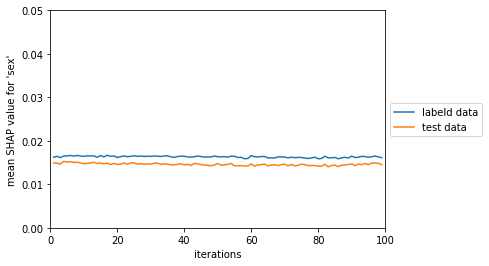

In [10]:
fig, ax = plt.subplots()
ax.set_xlim(0, 100)
ax.set_ylim(0, 0.05)

ax.plot(df['iteration'], df['mean_shap_values_L'])
ax.plot(df['iteration'], df['mean_shap_values_test'])
ax.set_xlabel("iterations")
ax.set_ylabel("mean SHAP value for 'sex'")
fig.legend(['labeld data', 'test data'],
           loc='center left', bbox_to_anchor=(0.9, 0.5))
plt.show()